This project figures out how spending habits change with age in customers, and how well different models can capture this relationship.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Marketing-Analytics/Data/age_spend.csv')
df.head()

,spend,age
0,2725.0,20.0
1,3010.0,38.0
2,2782.0,25.0
3,2809.0,31.0
4,2774.0,54.0


In [ ]:
X = df[['age']]

y = df['spend']

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

**Decision Tree**

The Decision tree algorithm gets their name from the inverted tree-like structures they follow. In a normal tree, the bottom part is the root, and the topmost part is the leaf of the tree. Since a decision tree follows the reverse structure, the topmost node is referred to as the root node. A node, in simple terms, is the smallest block in the decision tree. Every node has a certain rule that decides where to go next (which branch to follow). The last nodes or the terminal nodes of the decision tree are called leaves. This is where the target variable prediction happens. When a new input is provided for prediction, it first goes to the root node and then moves down to the leaf node for prediction.

Decision trees use multiple algorithms to split at the root node or sub-node. A decision tree goes through all of the features and picks the feature on which it can get the most homogeneous sub-nodes. For classification tasks, it decides the most homogeneous sub-nodes based on the information gained.

Information gain gives details on how much "information" a feature will hold about the class. Features that are perfectly separable or partitioned will give maximum information, while features that are not perfectly separable or partitioned will give us less information: $ IG(D_p,f) = I(D_p)-\frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})    $
 *  $IG$ = information gain 
 * $I$ = impurity 
 * $f$ = feature 
 * $D_p$ = parent dataset
 * $D_{left}$ = left child dataset 
 * $D_{right}$ = right child dataset
 * $N_p$ = total number of samples in the parent dataset 
 * $N_{left}$ = number of samples in the left child dataset
 * $N_{right}$ = number of samples in the right child dataset.

Gini impurity is a measure of misclassification, which applies in a multi-class classifier context. The Gini index can be defined as the criterion that would minimize the probability of misclassification: $ I_g(t) = \sum_{i=1}^k p(i|t)(1-p(i|t)) = 1 - \sum_{i=1}^k p(i|t)^2 $
 * $k$ = number of classes
 * $p(i│t)$ = proportion of samples that belong to class k for a particular node t.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train,y_train)

max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
 
linear_predictions = model.predict(X_test)
print('Linear model RMSE: ' + str(mean_squared_error(linear_predictions, y_test)**0.5))
 
max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + str(mean_squared_error(max2_tree_predictions, y_test)**0.5))
 
max5_tree_predictions = max5_tree_model.predict(X_test)
print('tree with max depth of 5 RMSE: ' + str(mean_squared_error(max5_tree_predictions, y_test)**0.5))

Linear model RMSE: 159.07639273785358
Tree with max depth of 2 RMSE: 125.1920405443602
tree with max depth of 5 RMSE: 109.73376798374653


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

ages = pd.DataFrame({'age':range(18,70)})

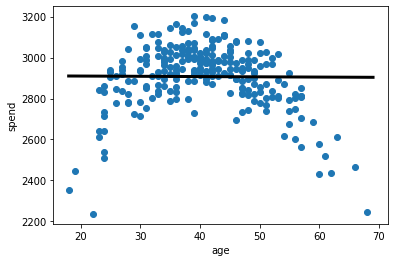

In [ ]:
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages,model.predict(ages), color='k', linewidth=3, label="Linear Regression")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

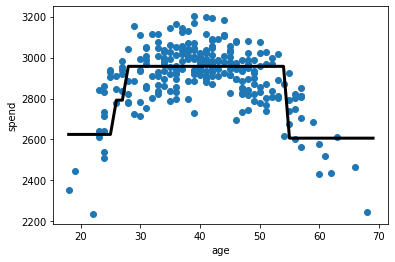

In [ ]:
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages,max2_tree_model.predict(ages), color='k', linewidth=3,label="Tree with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

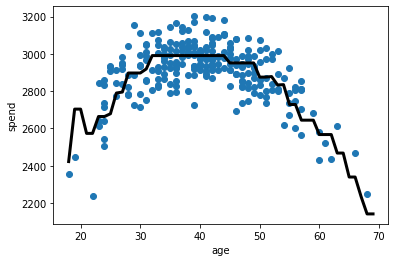

In [ ]:
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages,max5_tree_model.predict(ages), color='k', linewidth=3, label="Tree with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

**Random Forest**

The  random forest  algorithm reduces variance/overfitting by averaging multiple decision trees, which individually suffer from high variance.

Random Forest Algorithm:
1. A random bootstrap sample (a sample drawn with replacement) of size m is chosen from the training data. This splits the training data into subsets such as Data1, Data2, and so on. 
2. Decision trees are grown on each instance of the bootstrap. These decision trees can be referred to as Learner1, Learner2, and so on. 
3. d features are chosen randomly without replacement. 
4. Each node is split using the d features selected based on objective functions, which could be information gain. 
5. Steps 1-4 are repeated k times. Eventually, this generates Model1, Model2, and so on for each subset.
6. All of the predictions from the multiple trees are aggregated and assigned a class label by majority vote.

The thumb rule for variable selection of m variables out of total variables p, is m = sqrt(p) for classification and m = p/3 for regression problems randomly to avoid correlation among the individual trees. By doing so, significant improvement in accuracies can be achieved.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
max2_forest_model = RandomForestRegressor(max_depth=2, random_state=10)
max2_forest_model.fit(X_train,y_train)
 
max5_forest_model = RandomForestRegressor(max_depth=5, random_state=10)
max5_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=10)

In [ ]:
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Max depth of 2 RMSE: ' + str(mean_squared_error(max2_forest_predictions, y_test)**0.5))
 
max5_forest_predictions = max5_forest_model.predict(X_test)
print('Max depth of 5 RMSE: ' + str(mean_squared_error(max5_forest_predictions, y_test)**0.5))

Max depth of 2 RMSE: 116.57417072810561
Max depth of 5 RMSE: 109.05510027963649


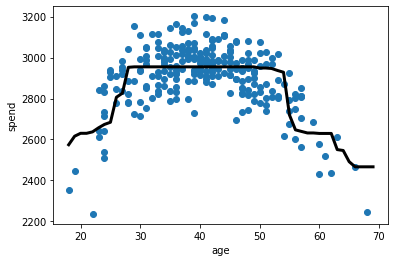

In [ ]:
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages,max2_forest_model.predict(ages), color='k',linewidth=3, label="Forest with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

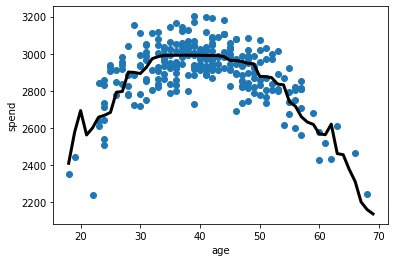

In [ ]:
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages,max5_forest_model.predict(ages), color='k',linewidth=3, label="Forest with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

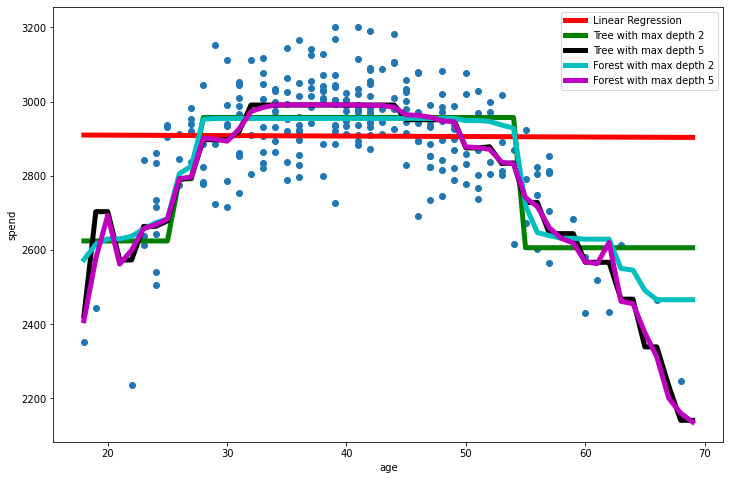

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages,model.predict(ages), color='r', linewidth=5, label="Linear Regression")
plt.plot(ages,max2_tree_model.predict(ages), color='g', linewidth=5,label="Tree with max depth 2")
plt.plot(ages,max5_tree_model.predict(ages), color='k', linewidth=5, label="Tree with max depth 5")
plt.plot(ages,max2_forest_model.predict(ages), color='c',linewidth=5, label="Forest with max depth 2")
plt.plot(ages,max5_forest_model.predict(ages), color='m', linewidth=5, label="Forest with max depth 5")
plt.legend()
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

In [ ]:
linear_predictions = model.predict(X_test)
print('Linear model RMSE: ' + str(mean_squared_error(linear_predictions, y_test)**0.5))
 
max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + str(mean_squared_error(max2_tree_predictions, y_test)**0.5))
 
max5_tree_predictions = max5_tree_model.predict(X_test)
print('tree with max depth of 5 RMSE: ' + str(mean_squared_error(max5_tree_predictions, y_test)**0.5))

max2_forest_predictions = max2_forest_model.predict(X_test)
print('Max depth of 2 RMSE: ' + str(mean_squared_error(max2_forest_predictions, y_test)**0.5))
 
max5_forest_predictions = max5_forest_model.predict(X_test)
print('Max depth of 5 RMSE: ' + str(mean_squared_error(max5_forest_predictions, y_test)**0.5))

Linear model RMSE: 159.07639273785358
Tree with max depth of 2 RMSE: 125.1920405443602
tree with max depth of 5 RMSE: 109.73376798374653
Max depth of 2 RMSE: 116.57417072810561
Max depth of 5 RMSE: 109.05510027963649
